In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

print('Data downloaded and read into a dataframe!')


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


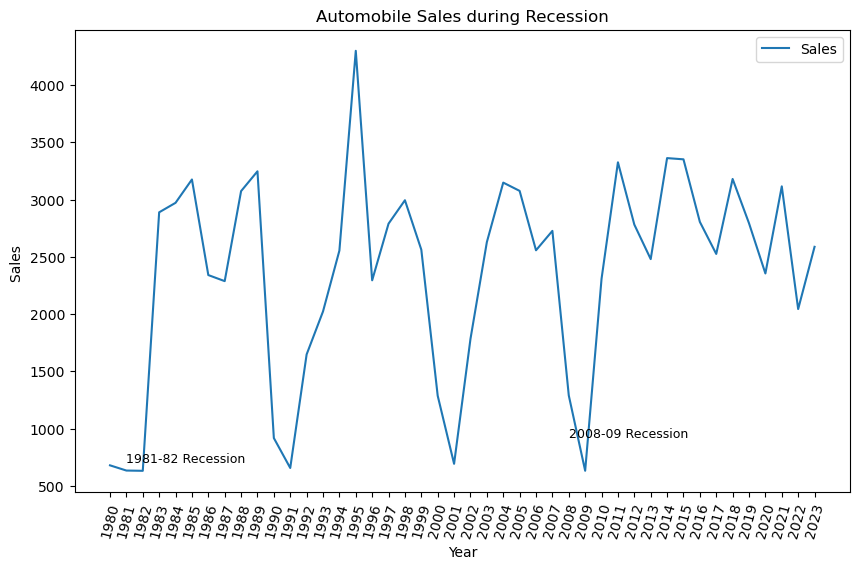

In [6]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10, 6))
df_line.plot(x=df_line.index, y=df_line.values)
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales ')

plt.text(1981, 700, '1981-82 Recession', fontsize=9)
plt.text(2008, 920, '2008-09 Recession', fontsize=9)

plt.legend(['Sales'])

plt.title('Automobile Sales during Recession')
plt.show()

In [10]:
df2=df[df["Recession"]==1]
df2

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


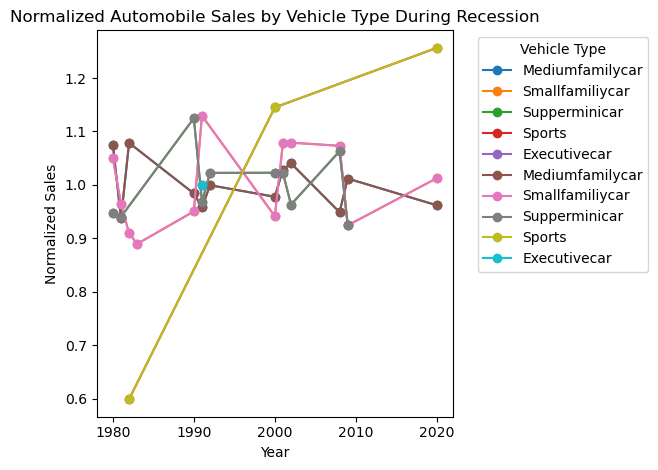

In [13]:
df_Mline = df2.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

df_Mline.set_index('Year', inplace=True)

for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df2['Year'].unique()

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
df1=df.groupby(["Vehicle_Type",'Recession'],as_index=False)["Automobile_Sales"].mean()

In [21]:
df1

,Vehicle_Type,Recession,Automobile_Sales
0,Executivecar,0,2686.436232
1,Executivecar,1,564.000000
2,Mediumfamilycar,0,2981.501935
3,Mediumfamilycar,1,674.847619
4,Smallfamiliycar,0,2752.658140
5,Smallfamiliycar,1,650.733333
6,Sports,0,2910.636264
7,Sports,1,170.333333
8,Supperminicar,0,2495.242222
9,Supperminicar,1,659.270968


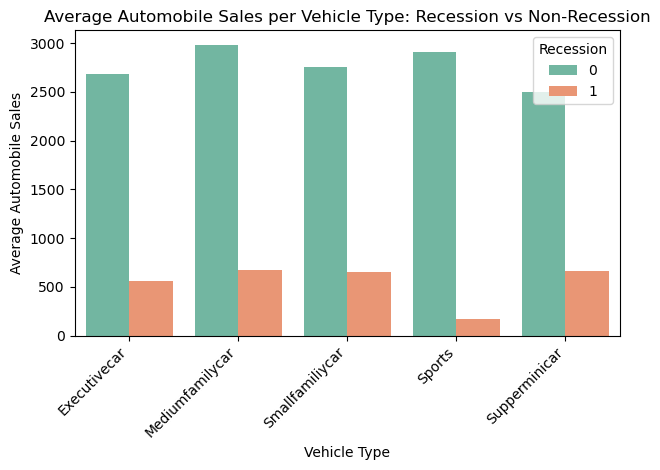

In [27]:
sns.barplot(data=df1, x="Vehicle_Type", y="Automobile_Sales", hue="Recession", palette="Set2")

# Fix overlapping x-axis labels
plt.xticks(rotation=45, ha="right")

# Add titles and labels
plt.title("Average Automobile Sales per Vehicle Type: Recession vs Non-Recession")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Automobile Sales")

plt.tight_layout()

# Show the plot
plt.show()

In [28]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

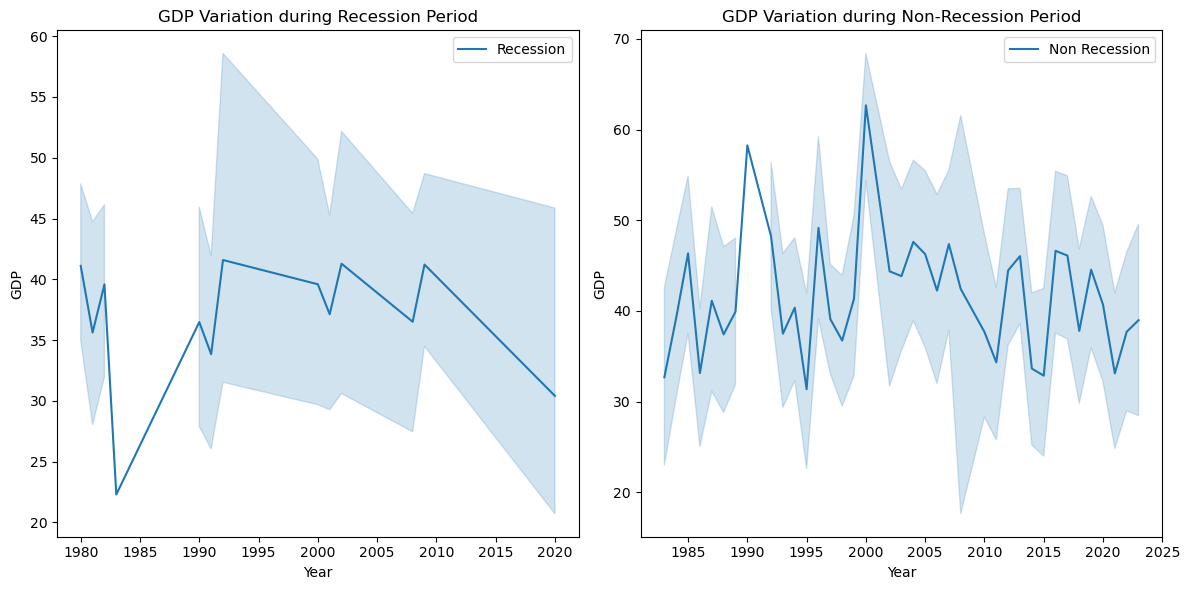

In [30]:
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]
    
    #Figure
    fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
    sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non Recession',ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP')
    ax1.set_title('GDP Variation during Non-Recession Period')
    
    plt.tight_layout()
    plt.show()

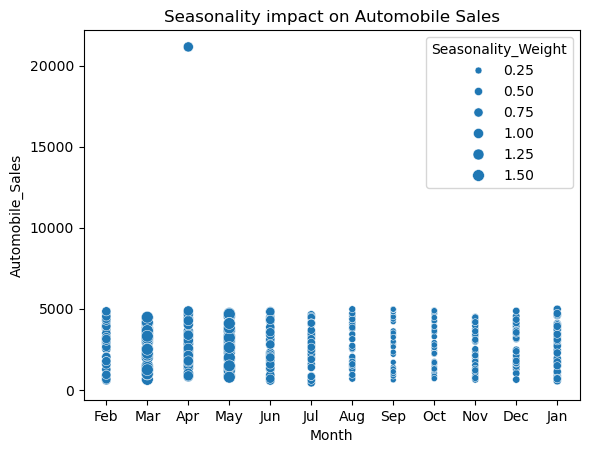

In [31]:
    non_rec_data = df[df['Recession'] == 0]
    
    size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
    sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

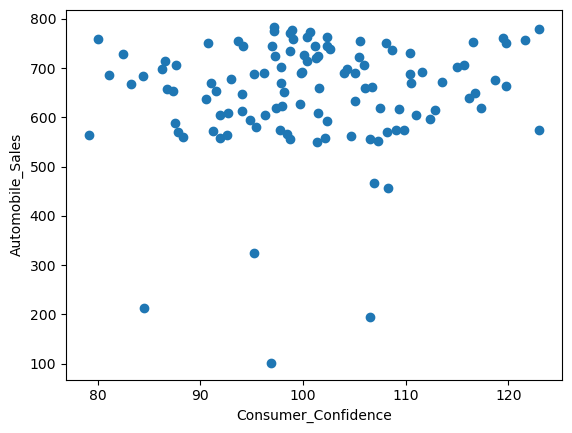

In [32]:
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('Consumer_Confidence')
    plt.ylabel('Automobile_Sales')
    plt.title('')
    plt.show()

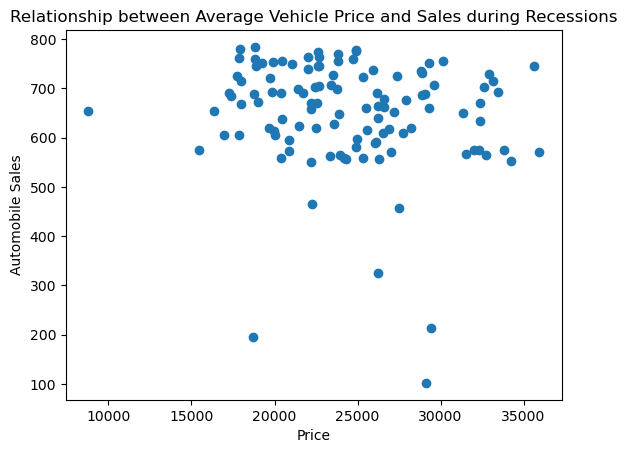

In [35]:
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
    plt.xlabel('Price')
    plt.ylabel('Automobile Sales')
    plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
    plt.show()

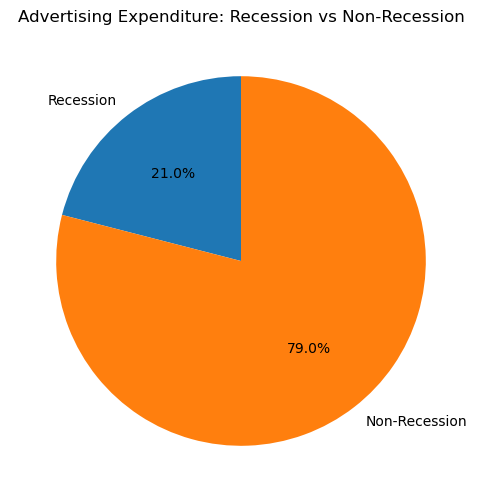

In [38]:
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['Advertising_Expenditure'].sum()
    NRAtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure 
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRAtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('Advertising Expenditure: Recession vs Non-Recession')

    plt.show()

In [39]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

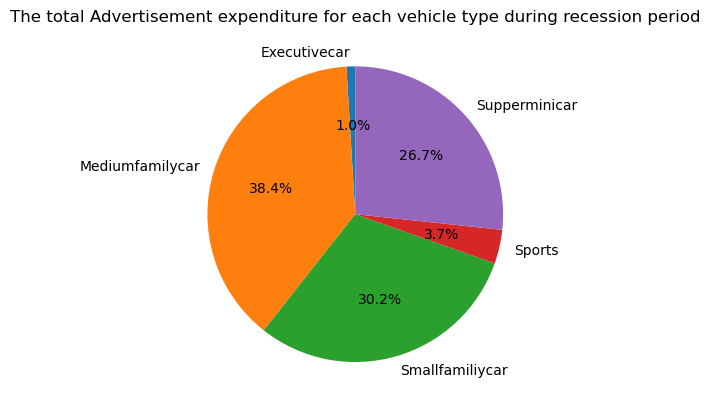

In [40]:
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('The total Advertisement expenditure for each vehicle type during recession period')

    plt.show()

In [46]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Mediumfamilycar    166
Smallfamiliycar    122
Sports              94
Supperminicar       76
Executivecar        70
Name: count, dtype: int64

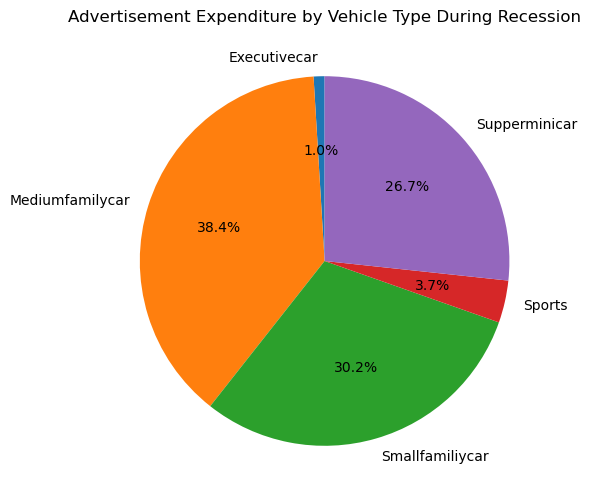

In [47]:
# Filter the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculate the total advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))  # You can adjust to (10, 8) for larger chart

labels = VTexpenditure.index
sizes = VTexpenditure.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement Expenditure by Vehicle Type During Recession')
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_8924\2424961048.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


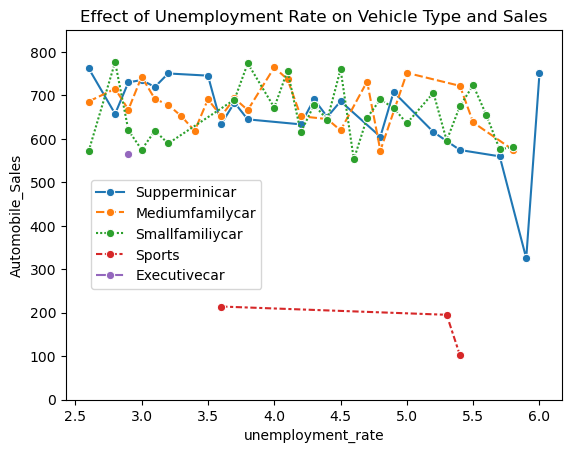

In [51]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.show()

In [53]:
import requests

# Download the file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"

response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"{filename} downloaded successfully.")
else:
    print("Failed to download file:", response.status_code)


us-states.json downloaded successfully.


In [56]:
    recession_data = df[df['Recession'] == 1]
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1